## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [199]:
# Import all necessary libraries and modules
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [200]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

# Read the CSV file into the DataFrame and set "Timestamp" as the index
bitstamp = pd.read_csv(Path('./Resources/bitstamp.csv'), 
                       index_col = 'Timestamp', parse_dates=True, 
                       infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [201]:
# Use the head function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [202]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

# Read the CSV file into the DataFrame and set "Timestamp" as the index
coinbase = pd.read_csv(Path('./Resources/coinbase.csv'), 
                       index_col = 'Timestamp', parse_dates=True, 
                       infer_datetime_format=True)

In [203]:
# Use the tail function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [204]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

# Find how many NaN data in total in bitstamp DataFrame
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [205]:
# Drop all NaN data
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [206]:
# Use the str.replace function to remove the dollar sign, $

# Remove "$" in "Close" column
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace("$","")

/Users/yjun_ln/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


### Step 3: Convert the data type of the Close column to a `float`.

In [207]:
# Convert data type of "Close" column to float
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype('float')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [208]:
# Review the data for duplicate values, and drop them if necessary
# Check total duplicated values in the DataFrame
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [209]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Find how many NaN data in total in coinbase DataFrame
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [210]:
# Drop all NaN data
coinbase = coinbase.dropna()

In [211]:
# Remove "$" in "Close" column
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].str.replace("$", "")

/Users/yjun_ln/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [212]:
# Convert data type of "Close" column to float
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype("float")

In [213]:
# Check total duplicated values in the DataFrame
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [214]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
# Using iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:,[3]]

# Display the first five rows of the bitstamp DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [215]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
# Using iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[3]]

# Display the first five rows of the coinbase DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [216]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp[['Close']].describe()
# or use bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [217]:
# Generate the summary statistics for the coinbase DataFrame
coinbase[['Close']].describe()
# or use coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

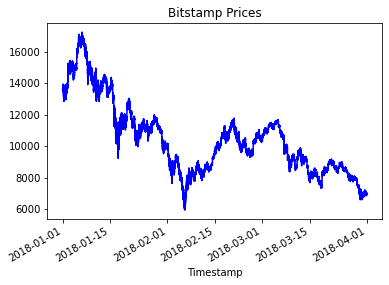

In [218]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

# Visualize bitstamp DataFrame in a blue line plot
bitstamp['Close'].plot(figsize=(6,4), title="Bitstamp Prices", color="blue")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

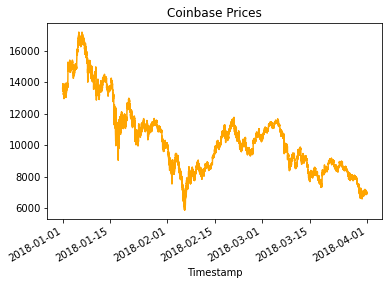

In [219]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

# Visualize coinbase DataFrame in an orange line plot
coinbase['Close'].plot(figsize=(6,4), title="Coinbase Prices", color="orange")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

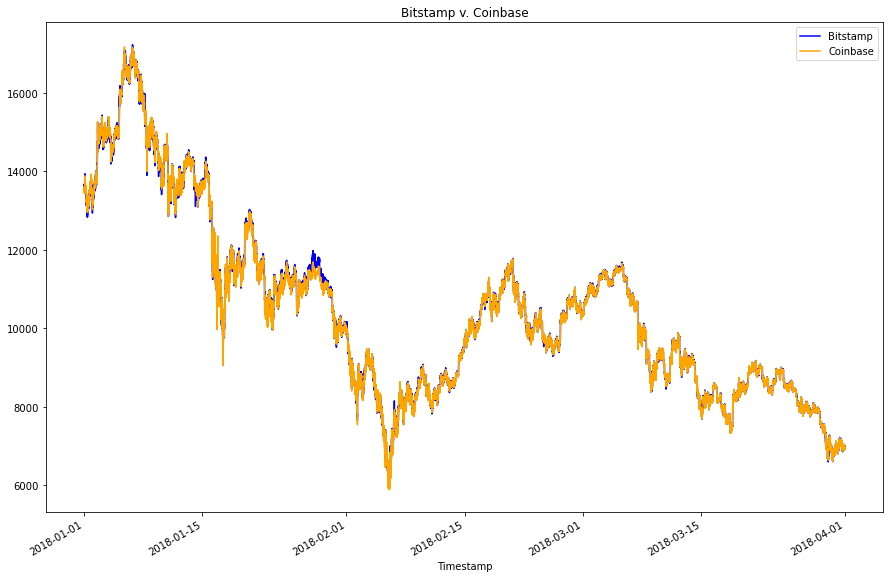

In [220]:
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot by enabling legend
bitstamp['Close'].plot(legend = True, figsize=(15,10), title='Bitstamp v. Coinbase', color='blue', label='Bitstamp')
coinbase['Close'].plot(legend = True, figsize = (15,10), color='orange', label= 'Coinbase')

<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

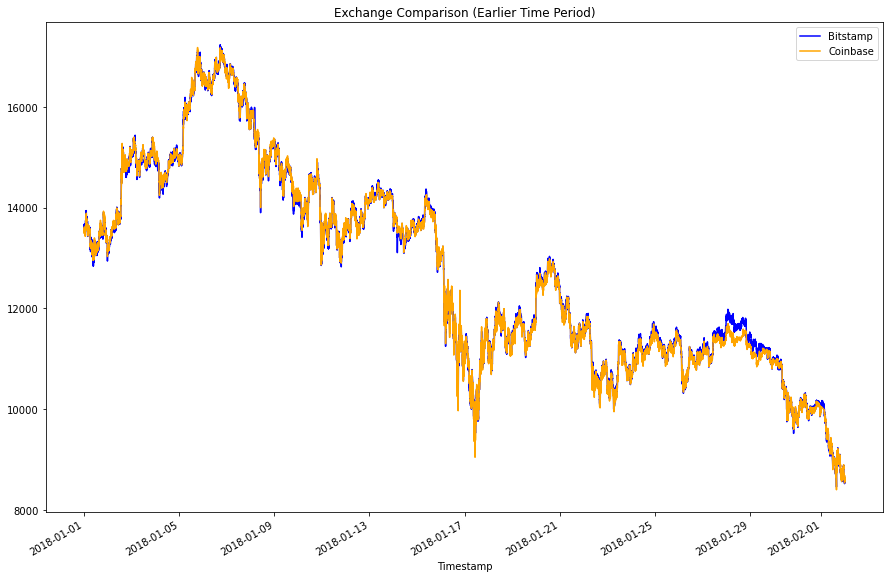

In [221]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# Overlay the visualizations for the bitstamp and coinbase DataFrames for 2018 January
bitstamp['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Earlier Time Period)", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period)'}, xlabel='Timestamp'>

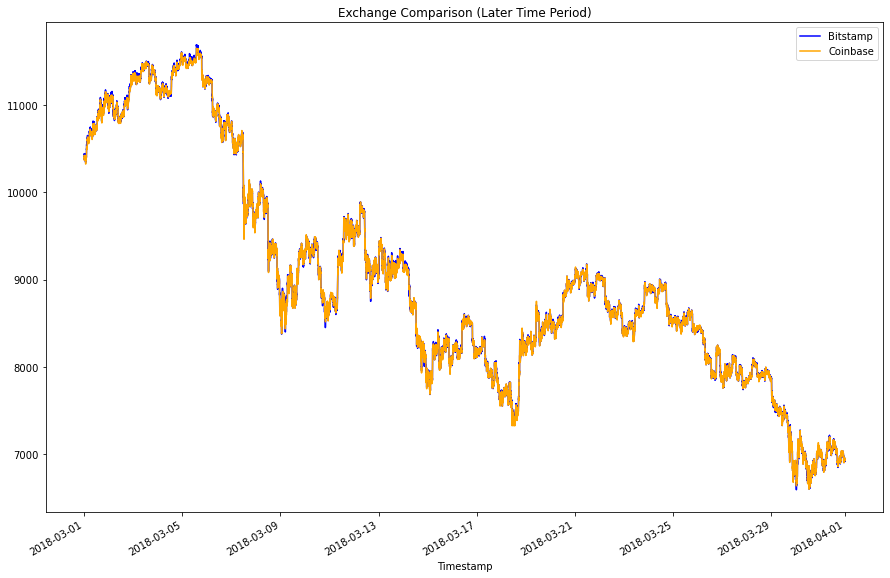

In [222]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# Overlay the visualizations for the bitstamp and coinbase DataFrames for 2018 March
bitstamp['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Later Time Period)", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes. Based on the visualization of Earlier and Later time periods, I can clearly see that the degree of spread is getting smaller. In other words, price differences are more obvious in earlier times than in later.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Jan. 16, 2018'}, xlabel='Timestamp'>

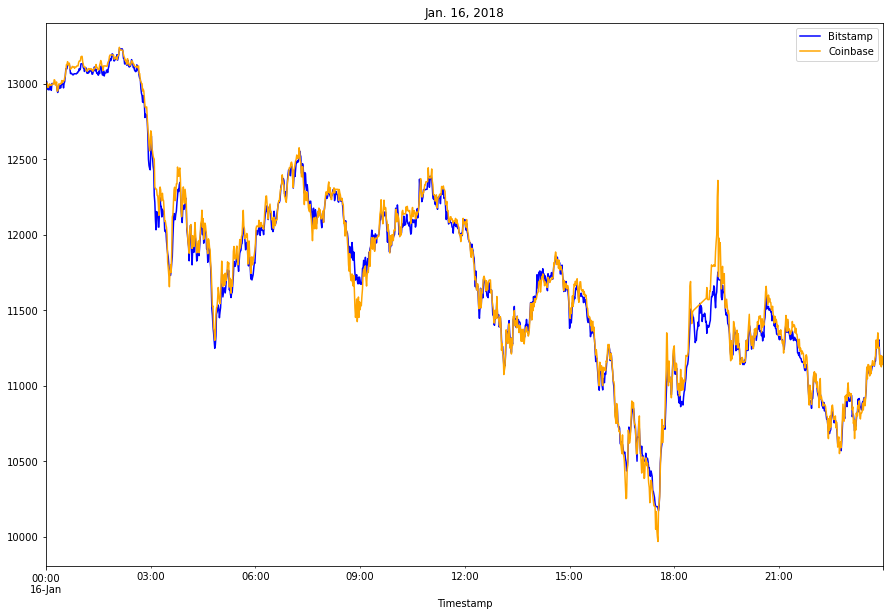

In [223]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# Overlay the visualizations for the bitstamp and coinbase DataFrames on Jan. 16, 2018
bitstamp['Close'].loc['2018-01-16'].plot(
    legend=True, figsize=(15, 10), title="Jan. 16, 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-16'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [224]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# Getting arbitrage spread between coinbase and bitstamp on Jan. 16, 2018
arbitrage_spread_early = coinbase['Close'].loc['2018-01-16'] - bitstamp['Close'].loc['2018-01-16']


# Generate summary statistics of the spread between coinbase and bitstamp on Jan. 16, 2018
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

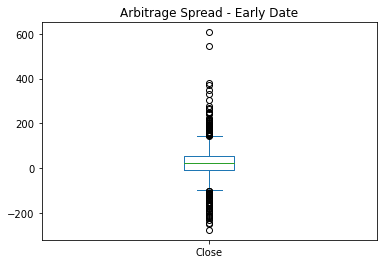

In [234]:
# Visualize the arbitrage spread from an early date (Jan. 16, 2018) in the dataset in a box plot
arbitrage_spread_early.plot(kind='box',title='Arbitrage Spread - Early Date')

<AxesSubplot:title={'center':'Feb. 24, 2018'}, xlabel='Timestamp'>

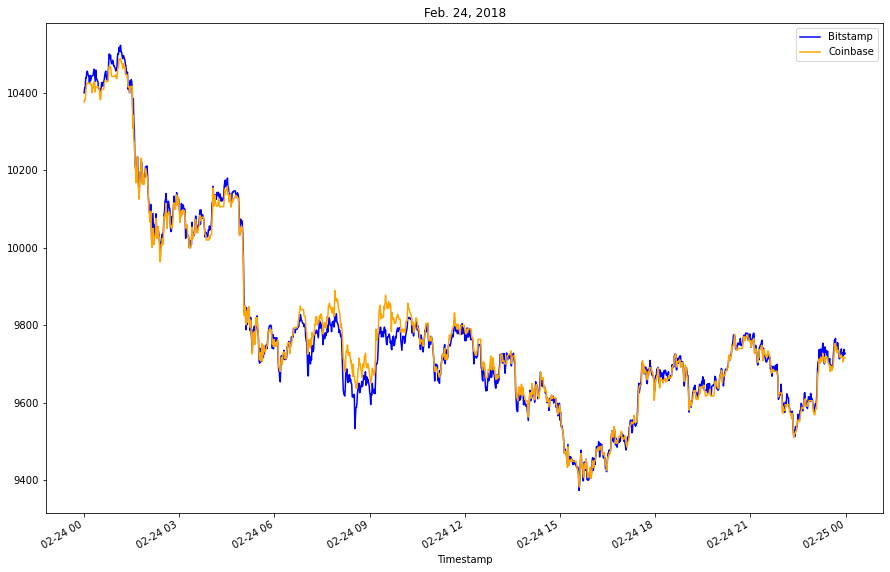

In [235]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# Overlay the visualizations for the bitstamp and coinbase DataFrames on Feb. 24, 2018
bitstamp['Close'].loc['2018-02-24'].plot(
    legend=True, figsize=(15, 10), title="Feb. 24, 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-24'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [236]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# Getting arbitrage spread between coinbase and bitstamp on Feb. 24, 2018
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-24'] - bitstamp['Close'].loc['2018-02-24']


# Generate summary statistics of the spread between coinbase and bitstamp on Feb. 24, 2018
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

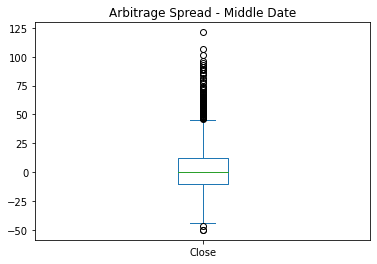

In [237]:
# Visualize the arbitrage spread from a middle date (Feb. 24, 2018) in the dataset in a box plot
arbitrage_spread_middle.plot(kind='box',title='Arbitrage Spread - Middle Date')

<AxesSubplot:title={'center':'Mar. 26, 2018'}, xlabel='Timestamp'>

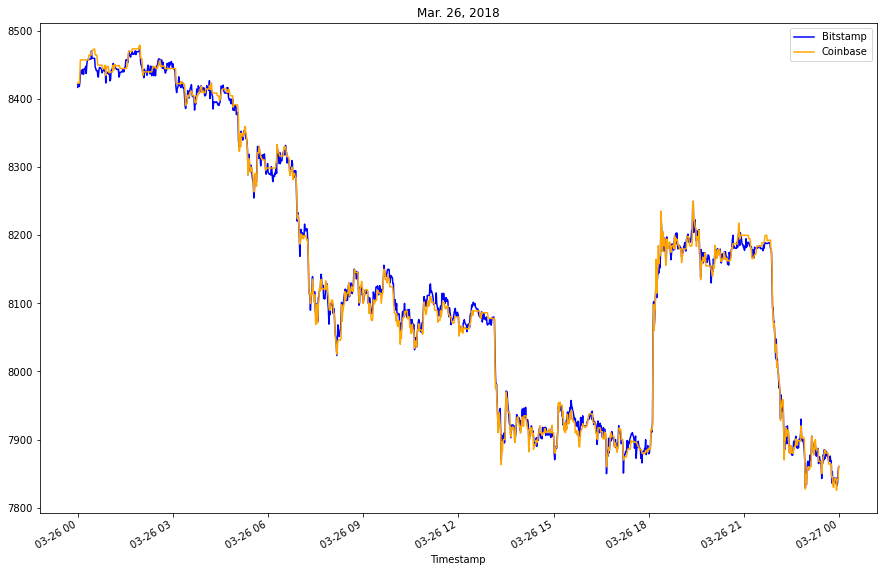

In [238]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# Overlay the visualizations for the bitstamp and coinbase DataFrames on Mar. 26, 2018
bitstamp['Close'].loc['2018-03-26'].plot(
    legend=True, figsize=(15, 10), title="Mar. 26, 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-26'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [239]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# Getting arbitrage spread between coinbase and bitstamp on Mar. 26, 2018
arbitrage_spread_late = coinbase['Close'].loc['2018-03-26'] - bitstamp['Close'].loc['2018-03-26']


# Generate summary statistics of the spread between coinbase and bitstamp on Mar. 26, 2018
arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

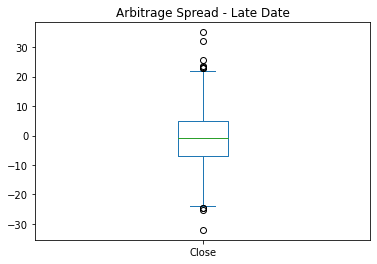

In [240]:
# Visualize the arbitrage spread from a late date (Mar. 26, 2018) in the dataset in a box plot
arbitrage_spread_late.plot(kind='box',title='Arbitrage Spread - Late Date')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [241]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# Getting arbitrage spread between coinbase and bitstamp on Jan. 16, 2018
arbitrage_spread_early = coinbase['Close'].loc['2018-01-16'] - bitstamp['Close'].loc['2018-01-16']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# Getting a data summary of arbitrage spread that are greater than 0
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [242]:
# For the middle date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# Getting arbitrage spread between coinbase and bitstamp on Feb. 24, 2018
arbitrage_spread_middle = coinbase['Close'].loc['2018-02-24'] - bitstamp['Close'].loc['2018-02-24']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# Getting a data summary of arbitrage spread that are greater than 0
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [243]:
# For the late date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# Getting arbitrage spread between coinbase and bitstamp on Mar. 26, 2018
arbitrage_spread_late = coinbase['Close'].loc['2018-03-26'] - bitstamp['Close'].loc['2018-03-26']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# Getting a data summary of arbitrage spread that are greater than 0
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [244]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
# Getting the positive arbitrage spread returns of Jan. 16, 2018
spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp['Close'].loc['2018-01-16']

# Review the top 5 rows of spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [245]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
# Getting the positive arbitrage spread returns of Feb. 24, 2018
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp['Close'].loc['2018-02-24']

# Review the top 5 rows of spread return DataFrame
spread_return_middle.head()

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64

In [246]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
# Getting the positive arbitrage spread returns of Mar. 26, 2018
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp['Close'].loc['2018-03-26']

# Review the top 5 rows of spread return DataFrame
spread_return_late.head()

Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [247]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
# Getting profitable arbitrage trades on Jan. 16, 2018
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [248]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
# Getting profitable arbitrage trades on Feb. 24, 2018
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [249]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
# Getting profitable arbitrage trades on Mar. 26, 2018
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [250]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# Getting a data summary of early date profitable trades
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [251]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# Getting a data summary of middle date profitable trades
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [252]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# Getting a data summary of late date profitable trades
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [253]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# Getting profit per trade in dollars
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

In [254]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# Getting profit per trade in dollars
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-24']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [255]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# Getting profit per trade in dollars
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-26']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [256]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

In [257]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

In [258]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

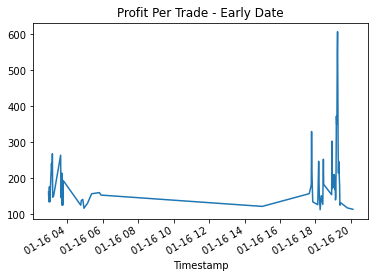

In [259]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title='Profit Per Trade - Early Date')

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timestamp'>

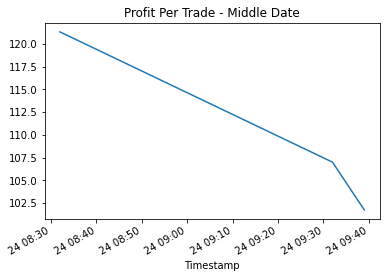

In [260]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(title='Profit Per Trade - Middle Date')

<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timestamp'>

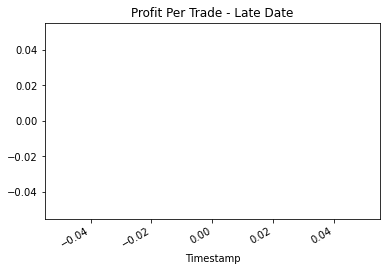

In [261]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(title='Profit Per Trade - Late Date')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [262]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

14147.169999999998

In [263]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

330.0699999999997

In [264]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [265]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
# Getting the cumulative profits for profit per trade on the early date
cumulative_profit_early =  profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

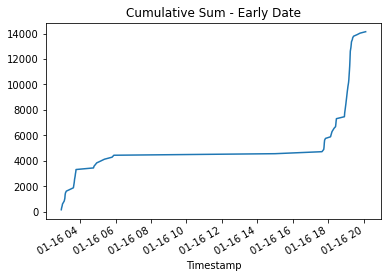

In [266]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(6,4), title='Cumulative Sum - Early Date')

In [267]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
# Getting the cumulative profits for profit per trade on the middle date
cumulative_profit_middle =  profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date'}, xlabel='Timestamp'>

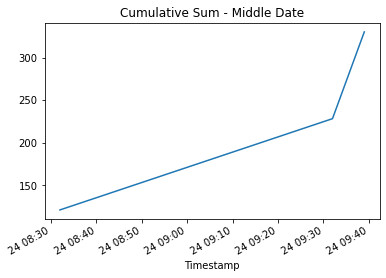

In [268]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(6,4), title='Cumulative Sum - Middle Date')

In [269]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
# Getting the cumulative profits for profit per trade on the late date
cumulative_profit_late =  profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Late Date'}, xlabel='Timestamp'>

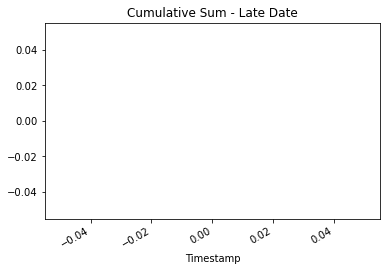

In [270]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(6,4), title='Cumulative Sum - Late Date')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** There is a potential pattern that arbitrage profits are higher during earlier dates of the total analyzed 3-month-period. Also, arbitrage oppotunities appear more frequent in the earlier dates of the total analyzed period.




**Analysis Report**

   This report covers the analysis of potential arbitrage opportunities in Bitcoin in different trading platforms. In order to conduct a thorough research and analysis, two specific trading exchanges are selected: Bitstamp and Coinbase. After collecting, preparing, and analying historical trading data (from 2018-01-01 to 2018-04-01) of Bitcoin on both exchanges, I have discovered that: potential arbitrage opportunities exist. Across the entire analyzing period, profit information displays the following trend: arbitrage profits are higher during earlier dates of the total analyzed 3-month-period, and arbitrage oppotunities appear more frequent in the earlier dates of the total analyzed period.
   From the Bitstamp v. Coinbase overlay graph below we can see that there are arbitrage oppotunities based on the distinct color differences btween the two.

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

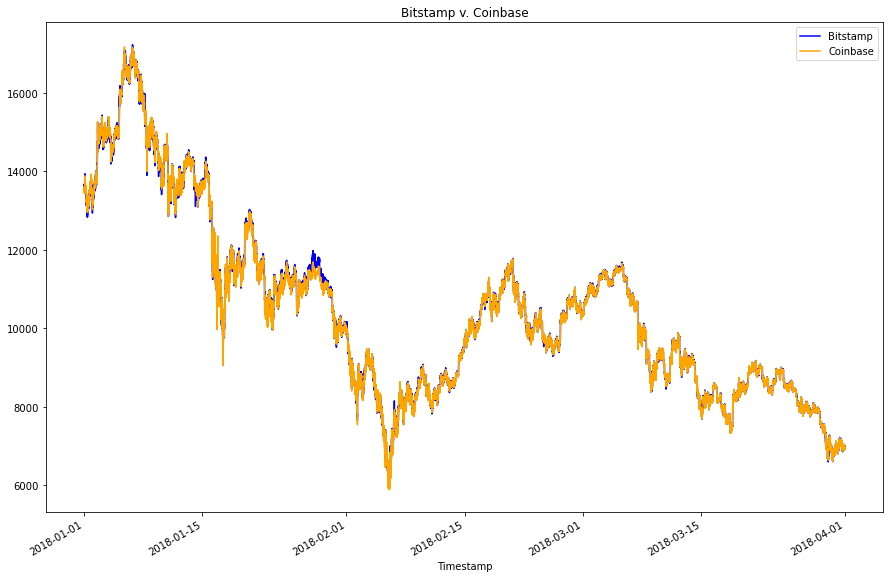

In [187]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot by enabling legend
bitstamp['Close'].plot(legend = True, figsize=(15,10), title='Bitstamp v. Coinbase', color='blue', label='Bitstamp')
coinbase['Close'].plot(legend = True, figsize = (15,10), color='orange', label= 'Coinbase')

More color differences and the color differences are more obvious in the earlier time period than later imply that there are more potential arbitrage opportunites and higher arbitrage profits in the earlier analyzed period than later. The box graphs suggests that data are more spread out in earlier date than in later.

<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

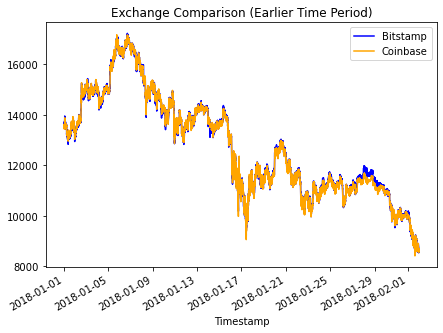

In [191]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames for 2018 January
bitstamp['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(7, 5), title="Exchange Comparison (Earlier Time Period)", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(7, 5), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

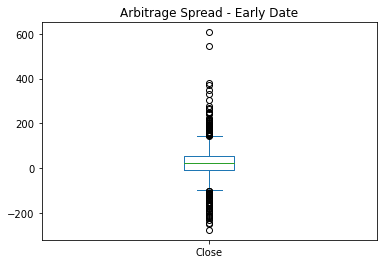

In [232]:
# Visualize the arbitrage spread from an early date (Jan. 16, 2018) in the dataset in a box plot
arbitrage_spread_early.plot(kind='box',title='Arbitrage Spread - Early Date')

<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period)'}, xlabel='Timestamp'>

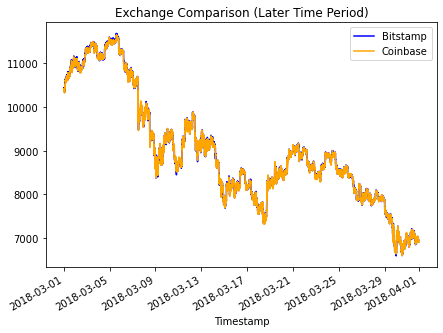

In [190]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames for 2018 March
bitstamp['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(7, 5), title="Exchange Comparison (Later Time Period)", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(7, 5), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

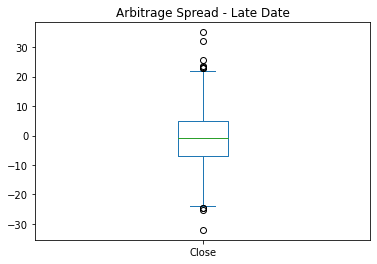

In [233]:
# Visualize the arbitrage spread from an late date (Mar. 26, 2018) in the dataset in a box plot
arbitrage_spread_late.plot(kind='box',title='Arbitrage Spread - Late Date')

In order to generate data visualization and deliver a more specific analysis, three dates were selected to represent data from the early days (Jan. 16, 2018), middle days (Feb. 24, 2018), and late days (Mar. 26, 2018) of the study period. By calculating profitable arbitrage trades for the early date with `profitable_trades_early = spread_return_early[spread_return_early > .01] ` and use similar functions to calculate the middle and late date. Based on the statistic summary of the claculation, I find out that the early date of the period has the most profitable arbitrage trading opportunities with 73 times. While the middle date has 3 and late date has none. 

In [192]:
# Generate the summary statistics for the early profit per trade DataFrame
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [193]:
# Generate the summary statistics for the middle profit per trade DataFrame
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [194]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

Further more, I calculated the profit per trade for the early date by using `profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-16']` and then for the middle date using a similar function. The results of total profit for both early and middle date below show an obvious advantage of trading in the early days of the period as it returns $13,817.10 more total profit in the early trading date.

In [195]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

14147.169999999998

In [196]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

330.0699999999997

Below graphs of cumulative sum of total profits for both early and middle dates describe that profitable arbitrage oppotunities appear more frequently in the early date than later. Also early date delivers higher profits than later.

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

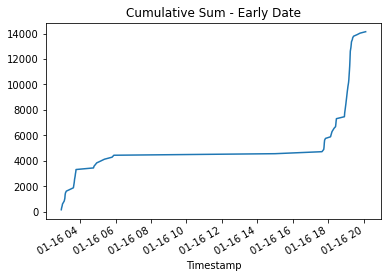

In [271]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(6,4), title='Cumulative Sum - Early Date')

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date'}, xlabel='Timestamp'>

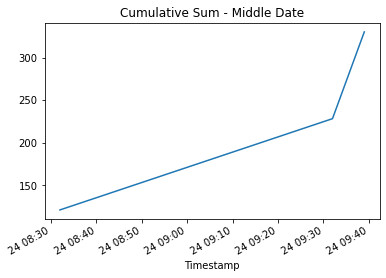

In [272]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(6,4), title='Cumulative Sum - Middle Date')

In conclusion, the analysis of Bitstamp and Coinbase trading data shows potential arbitrage opportunities exist especially in the early days of the period and early days tend to generate higher profits.